In [2]:
import time
#import csv2md
import torch as t
import numpy as np
import matplotlib.pyplot as plt
import open3d
from numpy import linalg as LA
import os
import h5py
import pandas as pd
from torch import nn
import math
import sys


In [5]:
sys.path.insert(1, 'C:/cherepashkin1/circles_public/')
from helpers import *

In [16]:
exec(open('C:/cherepashkin1/circles/finetune_test/helpers.py','r').read())

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Check distribution of orient values

In [3]:
df = pd.read_csv('C:/cherepashkin1/circles/finetune_test/csv/598frame.csv')

In [5]:
GTw = df.loc[:,['orient' + str(i) for i in range(9)]].values

In [6]:
GTw.shape

(5283, 9)

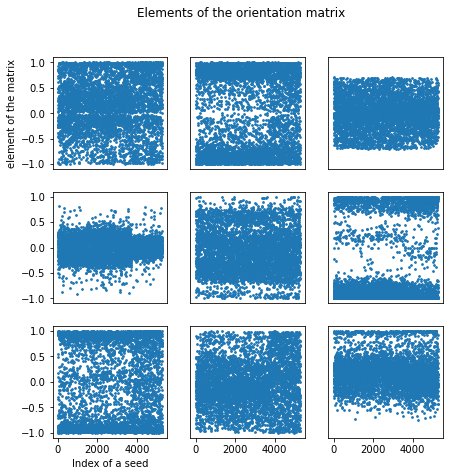

In [32]:
exec(open('C:/cherepashkin1/circles/finetune_test/helpers.py','r').read())
fig = plotori([GTw.reshape([-1,3,3])], tit='Elements of the orientation matrix', xtit = 'Index of a seed', ylim=(-1.1,1.1))

In [35]:
sf(fig, 'figs')

In [36]:
np.arcsin(-0.99)

-1.4292568534704695

In [37]:
np.arcsin(0.99)

1.4292568534704695

In [38]:
GTw.shape

(5283, 9)

In [39]:
or1 = GTw.reshape([-1,3,3])

In [40]:
or1.shape

(5283, 3, 3)

In [46]:
or1[0]

array([[ 0.41700143, -0.82275715,  0.38623888],
       [-0.13249349, -0.47543578, -0.86971621],
       [-0.89919702, -0.31149877,  0.30726737]])

Multiplying matrix by -1 is the same, as adding pi or minus pi to the euler angles

In [42]:
rot2eul(or1[0])

array([-0.79223651,  1.11793084, -0.30764163])

In [45]:
math.pi + rot2eul(or1[0])

array([2.34935614, 4.25952349, 2.83395103])

In [43]:
rot2eul(-or1[0])

array([ 2.34935614, -1.11793084,  2.83395103])

# Calculate minimum of losses

In [47]:
loss_fn = nn.MSELoss(reduction='none')

In [48]:
output = t.rand(15,9)

In [49]:
gt = t.rand(15,9)

In [50]:
output[0]-gt[0]

tensor([-0.0862, -0.1637, -0.2486, -0.7499,  0.1922, -0.1950, -0.2021, -0.9548,
        -0.2643])

In [107]:
t.min(loss_fn(output, gt), loss_fn(output, -gt)).shape

torch.Size([15, 9])

In [108]:
t.mean(t.min(loss_fn(output, gt), loss_fn(output, -gt)))

tensor(0.1465)

In [121]:
t.min(t.tensor([1, 2, 3]), t.tensor([2, 1, 4]))

tensor([1, 1, 3])

In [128]:
t.amin(t.tensor([[1, 2, 3], [2,1,4]]), dim=0)

tensor([1, 1, 3])

In [57]:
gt.shape

torch.Size([15, 9])

In [58]:
gt0 = gt[0]

In [59]:
gt0.shape

torch.Size([9])

In [60]:
gt1 = gt0.reshape([3,3])

In [61]:
gt1.shape

torch.Size([3, 3])

In [62]:
idx = np.array([[0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]])

In [63]:
idx.shape

(6, 3)

In [64]:
for i in range(6):
    print(idx[i,:])

[0 1 2]
[0 2 1]
[1 0 2]
[1 2 0]
[2 0 1]
[2 1 0]


In [68]:
1%2

1

In [76]:
t.tensor([(-1)**(i%2)*gt1[:,idx[i//2,:]] for i in range(12)])

ValueError: only one element tensors can be converted to Python scalars

In [90]:
gt.shape

torch.Size([15, 9])

In [98]:
output.shape

torch.Size([15, 9])

In [141]:
gt.reshape(-1,3,3).shape

torch.Size([15, 3, 3])

In [138]:
gt3 = gt.reshape(-1,3,3)
gt4 = t.zeros(gt3.shape[0],12,3,3)
lo = t.zeros(gt3.shape[0],12,9)
for j in range(gt3.shape[0]):
    for i in range(12):
        gt4[j,i,:,:] = (-1)**(i%2)*gt3[j,:,idx[i//2,:]]
        lo[j,i,:] = loss_fn(gt4[j,i,:,:].reshape(-1,9), output[j,:])
loss = t.mean(t.amin(lo, dim=1))

In [139]:
loss

tensor(0.0521)

In [122]:
lo.shape

torch.Size([15, 12, 9])

In [137]:
lo[0,2,:]

tensor([0.0074, 0.6453, 0.1529, 0.5624, 0.0983, 0.1001, 0.0408, 0.1337, 0.7285])

In [134]:
t.amin(lo, dim=1)[0]

tensor([0.0074, 0.0024, 0.0618, 0.2360, 0.0024, 0.0380, 0.0028, 0.1337, 0.0699])

In [119]:
t.min(lo,dim=1)

torch.return_types.min(
values=tensor([[7.4248e-03, 2.4345e-03, 6.1795e-02, 2.3601e-01, 2.4475e-03, 3.8040e-02,
         2.7741e-03, 1.3366e-01, 6.9874e-02],
        [3.0454e-06, 2.1222e-03, 8.2776e-04, 6.0206e-06, 6.2252e-02, 5.1937e-03,
         4.6103e-02, 1.4824e-03, 6.2338e-04],
        [1.6932e-04, 2.2219e-04, 2.9725e-02, 7.7859e-03, 3.6446e-03, 1.3518e-01,
         6.7949e-05, 2.5111e-03, 1.0878e-01],
        [2.2307e-04, 1.3739e-02, 7.3173e-03, 2.9067e-03, 2.5231e-03, 1.1443e-03,
         6.3966e-02, 1.9248e-03, 1.9626e-02],
        [8.5598e-05, 5.8223e-03, 2.9346e-03, 4.0489e-05, 6.6668e-06, 3.0103e-03,
         1.1470e-01, 4.0637e-04, 5.7765e-03],
        [3.3197e-05, 2.2370e-03, 1.8505e-03, 1.5067e-02, 8.0371e-03, 5.6294e-04,
         8.1897e-02, 1.7891e-02, 3.6758e-03],
        [3.4155e-02, 2.2678e-03, 1.8069e-03, 4.2062e-02, 7.5622e-02, 1.1752e-01,
         4.6144e-01, 1.1377e-02, 4.2165e-01],
        [3.6184e-03, 1.6108e-02, 5.4594e-02, 1.7361e-03, 3.1975e-03, 3.5066e-02,

In [105]:
lo.shape

torch.Size([15, 12, 9])

In [104]:
t.min(lo)

tensor(1.3683e-06)

In [96]:
gt4.shape

torch.Size([15, 12, 3, 3])

In [97]:
gt2.shape

torch.Size([12, 3, 3])

In [ ]:
for i in range(12):
    lo0[i] = loss_fn(output[0].reshape(-1,3,3), gt4[j,i,:,:])    

In [79]:

gt0.reshape([3,3])
gt1 = gt0.reshape([3,3])
gt2 = t.zeros(12,3,3)
for i in range(12):
    gt2[i,:,:] = (-1)**(i%2)*gt1[:,idx[i//2,:]]

In [80]:
gt2.shape

torch.Size([12, 3, 3])

In [87]:
output.shape

torch.Size([15, 9])

In [89]:
output[0].reshape(-1,3,3).shape

torch.Size([1, 3, 3])

In [88]:
lo0 = t.zeros(12,3,3)
for i in range(12):
#     print(loss_fn(output, gt2[i,:,:]).shape)
    lo0[i] = loss_fn(output[0].reshape(-1,3,3), gt2[i,:,:])

C:\Users\v.cherepashkin\Anaconda3\envs\sh\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([3, 3])) that is different to the input size (torch.Size([1, 3, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
gt2[i]

In [67]:
t.min(gt2[i,:,:])

tensor(0.1330)

# check center of masses

In [142]:
df

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,moment1,...,eul2,orient0,orient1,orient2,orient3,orient4,orient5,orient6,orient7,orient8
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976,164563652,...,0.523979,0.417001,-0.822757,0.386239,-0.132493,-0.475436,-0.869716,-0.899197,-0.311499,0.307267
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811,167247653,...,-2.110121,-0.396725,0.766132,-0.505620,0.047406,-0.532986,-0.844795,0.916712,0.359121,-0.175130
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825,136293591,...,-1.352440,0.238723,-0.947801,0.211387,-0.166528,-0.254412,-0.952650,-0.956703,-0.192217,0.218569
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431,128225058,...,-1.673317,0.475076,-0.874071,-0.101501,-0.161030,0.027042,-0.986579,-0.865085,-0.485045,0.127905
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806,165420434,...,-2.342986,-0.207030,0.696365,0.687178,0.282786,0.715009,-0.639371,0.936574,-0.061955,0.344950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172,86812440,...,1.273703,-0.288228,0.912054,0.291687,0.002986,-0.303757,0.952745,-0.957557,-0.275479,-0.084828
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084,171184215,...,-1.868335,-0.842404,0.470543,-0.262574,-0.021352,-0.516056,-0.856289,0.538423,0.715735,-0.444775
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856,102768458,...,-1.745811,0.765961,-0.619616,-0.171406,-0.018797,0.244920,-0.969361,-0.642613,-0.745714,-0.175952
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177,249010683,...,0.990322,-0.783147,-0.462793,0.415335,-0.116293,0.765135,0.633281,0.610865,-0.447652,0.653033


# file name instean of machine homepath

In [1]:
s = 'C:/cherepashkin1/circles_public/finetune_test/'

In [2]:
s.split('cherepashkin1')

['C:/', '/circles_public/finetune_test/']

# Rewrite 598frame such that it needs only one image

In [6]:
df = pd.read_csv('C:/cherepashkin1/circles_public/finetune_test/csv/598frame.csv')

In [7]:
df

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,moment1,...,eul2,orient0,orient1,orient2,orient3,orient4,orient5,orient6,orient7,orient8
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976,164563652,...,0.523979,0.417001,-0.822757,0.386239,-0.132493,-0.475436,-0.869716,-0.899197,-0.311499,0.307267
1,1,598csv/1484717/1491989,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811,167247653,...,-2.110121,-0.396725,0.766132,-0.505620,0.047406,-0.532986,-0.844795,0.916712,0.359121,-0.175130
2,2,598csv/1484717/1491990,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825,136293591,...,-1.352440,0.238723,-0.947801,0.211387,-0.166528,-0.254412,-0.952650,-0.956703,-0.192217,0.218569
3,3,598csv/1484717/1491991,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431,128225058,...,-1.673317,0.475076,-0.874071,-0.101501,-0.161030,0.027042,-0.986579,-0.865085,-0.485045,0.127905
4,4,598csv/1484717/1491992,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806,165420434,...,-2.342986,-0.207030,0.696365,0.687178,0.282786,0.715009,-0.639371,0.936574,-0.061955,0.344950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484760/1500857,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172,86812440,...,1.273703,-0.288228,0.912054,0.291687,0.002986,-0.303757,0.952745,-0.957557,-0.275479,-0.084828
5279,5279,598csv/1484760/1500858,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084,171184215,...,-1.868335,-0.842404,0.470543,-0.262574,-0.021352,-0.516056,-0.856289,0.538423,0.715735,-0.444775
5280,5280,598csv/1484760/1500859,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856,102768458,...,-1.745811,0.765961,-0.619616,-0.171406,-0.018797,0.244920,-0.969361,-0.642613,-0.745714,-0.175952
5281,5281,598csv/1484760/1500860,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177,249010683,...,0.990322,-0.783147,-0.462793,0.415335,-0.116293,0.765135,0.633281,0.610865,-0.447652,0.653033


In [12]:
df1 = df.drop(columns="file_name")

In [13]:
df1

,index,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,moment1,moment2,...,eul2,orient0,orient1,orient2,orient3,orient4,orient5,orient6,orient7,orient8
0,0,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976,164563652,575078730,...,0.523979,0.417001,-0.822757,0.386239,-0.132493,-0.475436,-0.869716,-0.899197,-0.311499,0.307267
1,1,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811,167247653,479568284,...,-2.110121,-0.396725,0.766132,-0.505620,0.047406,-0.532986,-0.844795,0.916712,0.359121,-0.175130
2,2,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825,136293591,446703489,...,-1.352440,0.238723,-0.947801,0.211387,-0.166528,-0.254412,-0.952650,-0.956703,-0.192217,0.218569
3,3,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431,128225058,412001326,...,-1.673317,0.475076,-0.874071,-0.101501,-0.161030,0.027042,-0.986579,-0.865085,-0.485045,0.127905
4,4,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806,165420434,442680482,...,-2.342986,-0.207030,0.696365,0.687178,0.282786,0.715009,-0.639371,0.936574,-0.061955,0.344950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172,86812440,460315264,...,1.273703,-0.288228,0.912054,0.291687,0.002986,-0.303757,0.952745,-0.957557,-0.275479,-0.084828
5279,5279,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084,171184215,419739092,...,-1.868335,-0.842404,0.470543,-0.262574,-0.021352,-0.516056,-0.856289,0.538423,0.715735,-0.444775
5280,5280,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856,102768458,568026943,...,-1.745811,0.765961,-0.619616,-0.171406,-0.018797,0.244920,-0.969361,-0.642613,-0.745714,-0.175952
5281,5281,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177,249010683,530651160,...,0.990322,-0.783147,-0.462793,0.415335,-0.116293,0.765135,0.633281,0.610865,-0.447652,0.653033


In [21]:
df1.insert(1, 'file_name', ['598csv/1484717/1491988',]*5283)

In [20]:
df1 = df1.drop(columns = 'file_name')

In [22]:
df1

,index,file_name,zero_angle,x_cms,y_cms,z_cms,delta_x,delta_y,moment0,moment1,...,eul2,orient0,orient1,orient2,orient3,orient4,orient5,orient6,orient7,orient8
0,0,598csv/1484717/1491988,8.0,129.831987,43.936533,154.317130,0.000000,0.000000,504089976,164563652,...,0.523979,0.417001,-0.822757,0.386239,-0.132493,-0.475436,-0.869716,-0.899197,-0.311499,0.307267
1,1,598csv/1484717/1491988,9.0,119.950786,48.513970,141.181489,0.040641,0.000000,428386811,167247653,...,-2.110121,-0.396725,0.766132,-0.505620,0.047406,-0.532986,-0.844795,0.916712,0.359121,-0.175130
2,2,598csv/1484717/1491988,8.0,123.014476,47.128630,155.613687,0.051783,0.516619,363275825,136293591,...,-1.352440,0.238723,-0.947801,0.211387,-0.166528,-0.254412,-0.952650,-0.956703,-0.192217,0.218569
3,3,598csv/1484717/1491988,5.0,120.352368,42.278210,136.717018,0.032078,0.516619,381880431,128225058,...,-1.673317,0.475076,-0.874071,-0.101501,-0.161030,0.027042,-0.986579,-0.865085,-0.485045,0.127905
4,4,598csv/1484717/1491988,11.0,120.963969,52.290549,139.462856,0.007131,0.688826,395257806,165420434,...,-2.342986,-0.207030,0.696365,0.687178,0.282786,0.715009,-0.639371,0.936574,-0.061955,0.344950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,598csv/1484717/1491988,10.0,121.881008,24.875571,128.604963,-5.848818,0.516619,435057172,86812440,...,1.273703,-0.288228,0.912054,0.291687,0.002986,-0.303757,0.952745,-0.957557,-0.275479,-0.084828
5279,5279,598csv/1484717/1491988,22.0,138.268651,47.324900,118.120206,-5.682811,0.516619,521235084,171184215,...,-1.868335,-0.842404,0.470543,-0.262574,-0.021352,-0.516056,-0.856289,0.538423,0.715735,-0.444775
5280,5280,598csv/1484717/1491988,21.0,140.535355,24.351695,137.298298,-5.663254,0.516619,620853856,102768458,...,-1.745811,0.765961,-0.619616,-0.171406,-0.018797,0.244920,-0.969361,-0.642613,-0.745714,-0.175952
5281,5281,598csv/1484717/1491988,21.0,132.135006,52.008363,115.020311,-5.555135,0.516619,661442177,249010683,...,0.990322,-0.783147,-0.462793,0.415335,-0.116293,0.765135,0.633281,0.610865,-0.447652,0.653033


In [23]:
a = (1, 2)

In [28]:
assert isinstance(a, int)

AssertionError: 

In [29]:
isinstance(a, tuple)

True

# Find closest orthogonal vector to the output

In [2]:
ot = np.genfromtxt('C:/cherepashkin1/circles_public/plot_output/e067/021l/val_out', delimiter=',')

In [3]:
ot.shape

(15, 9)

In [11]:
V = ot[0].reshape(3,3)

In [27]:
Q1 = LA.svd(V)[0]
Q2 = LA.svd(V)[2].T

In [28]:
W = np.matmul(LA.svd(V)[0],LA.svd(V)[2])

In [30]:
V

array([[ 0.11940472, -0.40824506, -0.35526922],
       [ 0.47464806, -0.75269115,  0.47888228],
       [ 0.08279464, -0.41067496,  0.92982817]])

In [29]:
W

array([[-0.29245053, -0.79835472, -0.5264052 ],
       [ 0.8546832 , -0.46512808,  0.23059165],
       [-0.42893977, -0.38247303,  0.81836731]])

In [31]:
D = -2*np.trace(np.matmul(V,W.T))

In [32]:
D

-4.453433765082149

In [18]:
LA.inv(W)

array([[-0.01377849, -0.52173246, -0.52496248],
       [-1.04768354, -0.63131006,  0.65492385],
       [-4.22516751,  3.5090097 , -3.37652287]])

In [26]:
W.T - LA.inv(W)

array([[ 8.88178420e-16, -2.22044605e-16,  8.32667268e-16],
       [ 8.88178420e-16, -3.88578059e-16,  8.88178420e-16],
       [-1.11022302e-16,  5.55111512e-17, -4.44089210e-16]])

In [17]:
np.matmul(W.T)

array([[ 0.3376446 ,  0.13989453, -0.12164918],
       [ 0.30334062,  1.25981658,  0.73570354],
       [-1.46020556,  2.58701934,  5.51573696]])

In [ ]:
D = -np.trace()

In [33]:
W2 = t.Tensor(W)

In [35]:
V2 = t.Tensor(V)

In [37]:
t.svd(V2)

torch.return_types.svd(
U=tensor([[-0.0186, -0.7551, -0.6554],
        [-0.7048, -0.4550,  0.5443],
        [-0.7092,  0.4720, -0.5237]]),
S=tensor([1.3509, 0.7207, 0.1551]),
V=tensor([[-0.2927, -0.3705,  0.8815],
        [ 0.6139,  0.6339,  0.4704],
        [-0.7331,  0.6789,  0.0419]]))

In [58]:
ot = t.rand(12,3,3)

In [59]:
ot.shape

torch.Size([12, 3, 3])

In [52]:
for i in range(ot.shape[0]):
    W2 = t.matmul(t.svd(ot[i,:,:])[0],t.svd(ot[i,:,:])[2].T)

In [53]:
W2

tensor([[ 0.0223, -0.9167, -0.3990],
        [-0.4720,  0.3422, -0.8125],
        [ 0.8813,  0.2065, -0.4250]])

In [54]:
W

array([[-0.29245053, -0.79835472, -0.5264052 ],
       [ 0.8546832 , -0.46512808,  0.23059165],
       [-0.42893977, -0.38247303,  0.81836731]])

In [55]:
t.linalg.inv(W2)-W2.T

tensor([[-2.3842e-07,  1.7881e-07, -1.7881e-07],
        [ 1.1921e-07, -2.9802e-08,  2.2352e-07],
        [ 2.9802e-08, -1.1921e-07, -2.9802e-08]])

In [64]:
a = float('NaN')

In [67]:
if math.isnan(a):
    print(1)

1


In [70]:
a

nan

In [72]:
if a:
    print(0)

In [71]:
a = 0

In [74]:
if all([not a, 1==1]):
    print(1)

1


In [63]:
a = NaN

NameError: name 'NaN' is not defined

In [79]:
isinstance(W2, t.Tensor)

True

In [77]:
type(W2)

torch.Tensor

In [ ]:
latent = np.genfromtxt()

In [88]:
for i in np.arange(0, 1e-3, 1e-4):
    print(i)

0.0
0.0001
0.0002
0.00030000000000000003
0.0004
0.0005
0.0006000000000000001
0.0007
0.0008
0.0009000000000000001


In [89]:
len([1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3])

10

# Consolidate results from jureca

In [11]:
from PIL import Image

In [8]:
cip = []

In [24]:
for root, structure, files in os.walk('C:/cherepashkin1/circles_public/plot_output/e068'):
    for file in files:
        if 'Average_loss_Loss.png' in file:
#             print(os.path.join(root, file))
            cip.append(os.path.join(root, file))

In [ ]:

  
# open method used to open different extension image file
im = Image.open(r"C:\Users\System-Pc\Desktop\ybear.jpg") 
  
# This method will show image in any image viewer 
im.show() 

<ipython-input-25-134d4af43c7a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


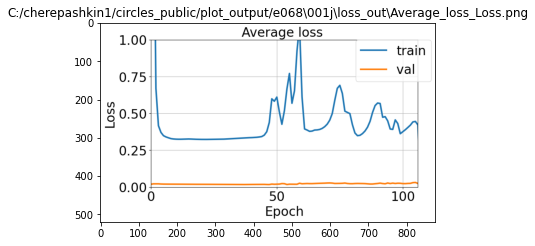

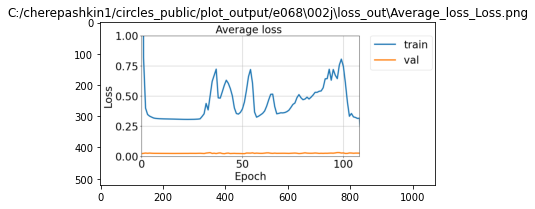

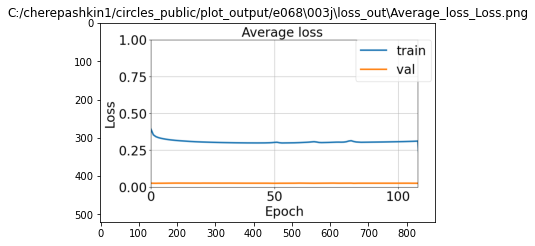

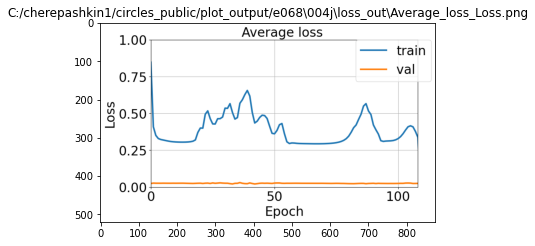

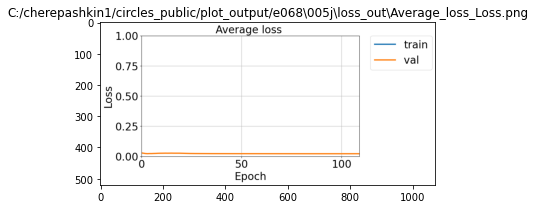

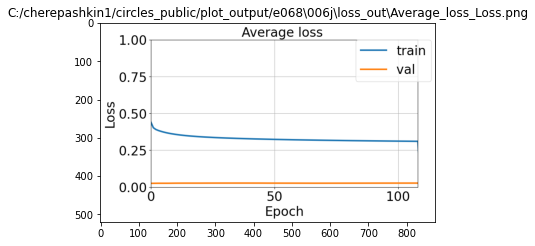

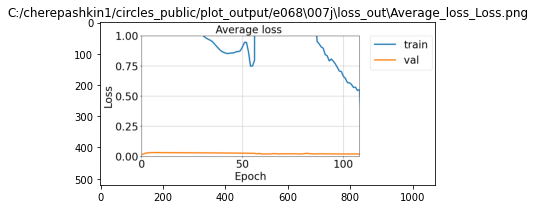

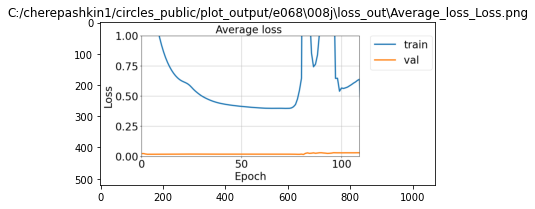

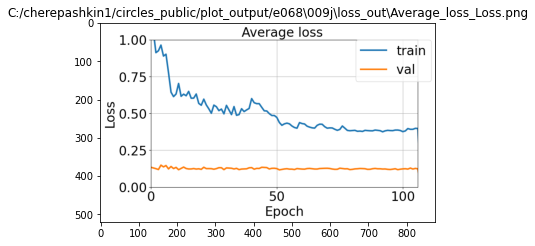

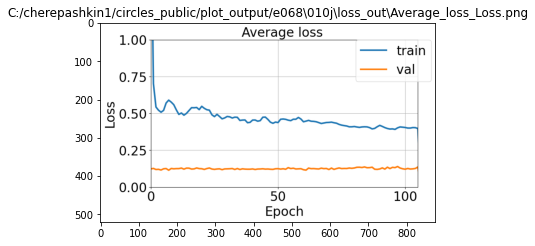

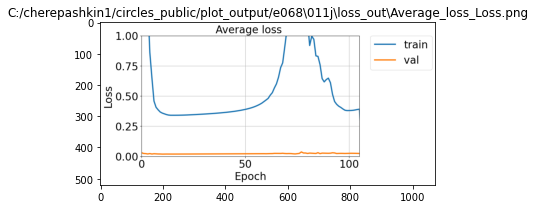

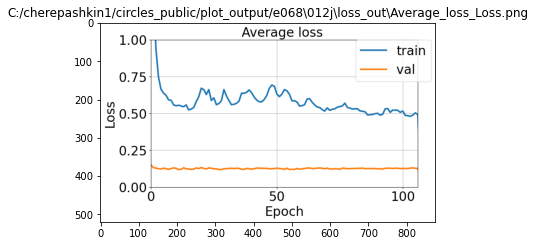

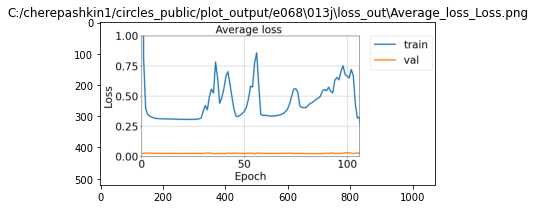

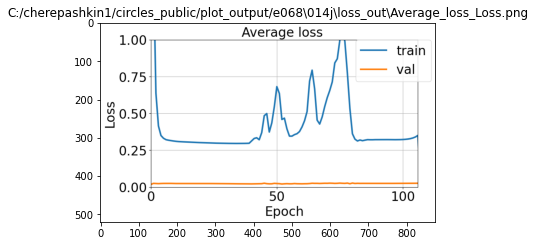

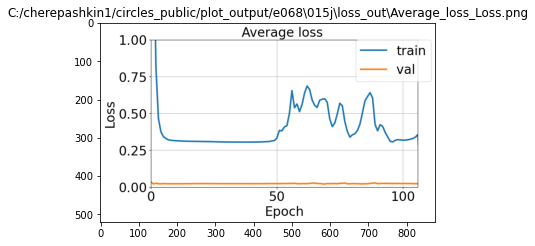

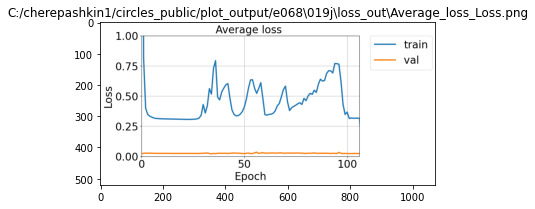

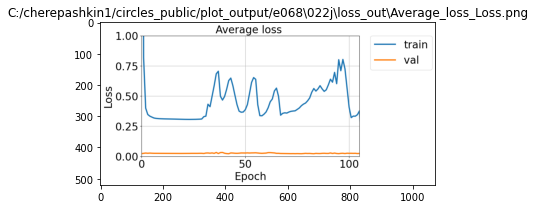

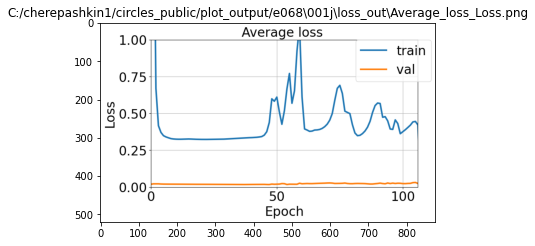

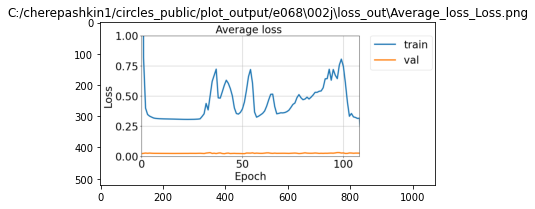

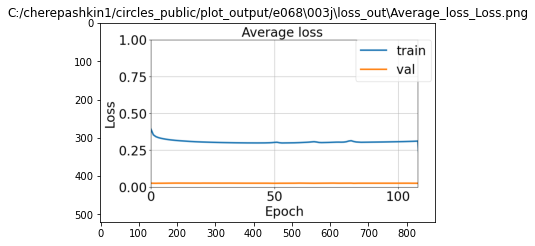

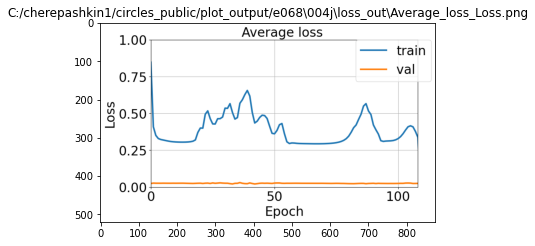

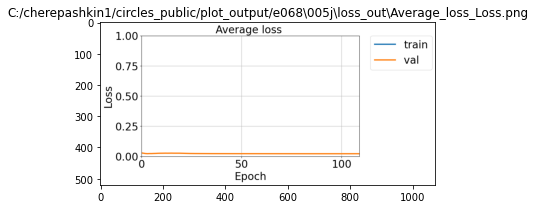

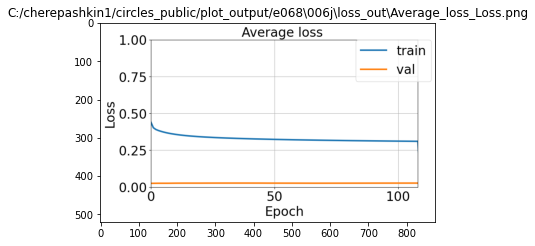

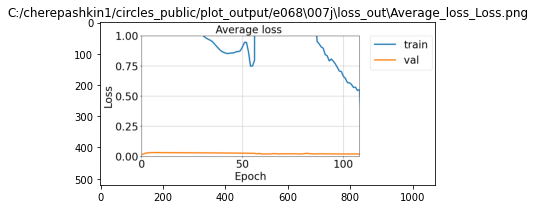

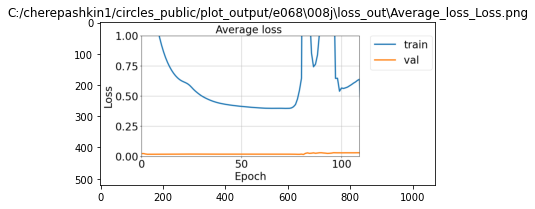

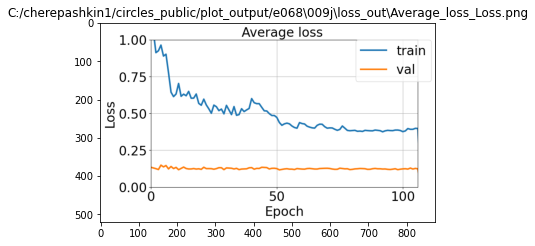

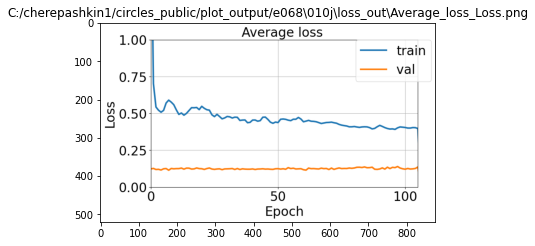

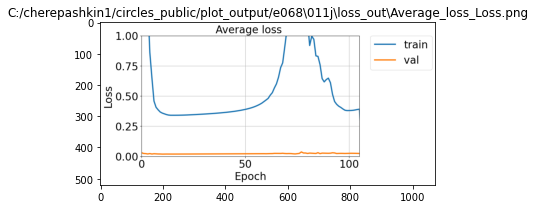

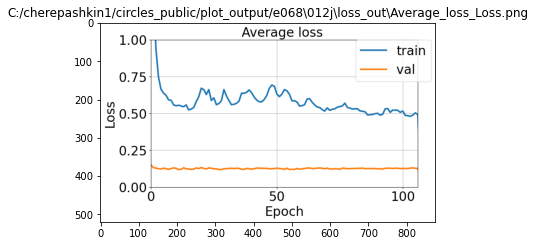

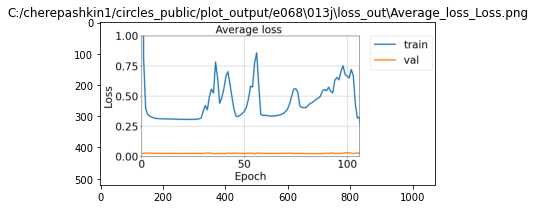

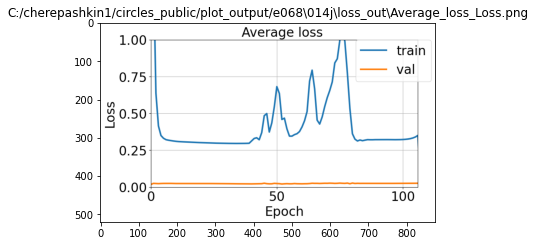

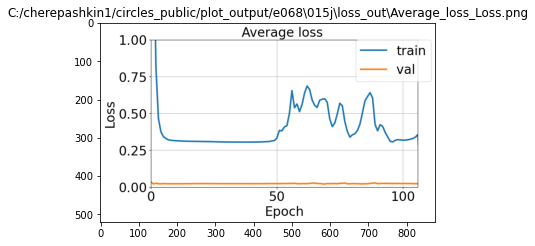

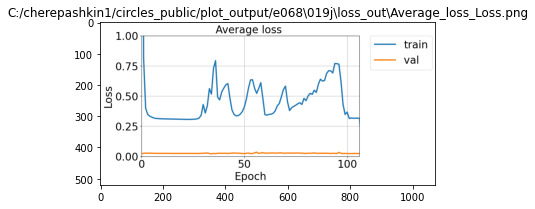

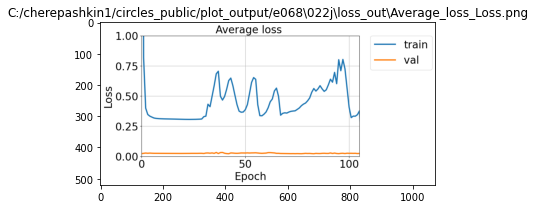

In [25]:
for i in cip:
    im = Image.open(i)
    fig = plt.figure()
    plt.imshow(im)
    plt.title(i)
#     im.show()

In [17]:
import shutil

In [18]:
shutil.copytree('C:/cherepashkin1/circles_public/plot_output/e067/016w/','C:/cherepashkin1/local_output/e067/016w')

'C:/cherepashkin1/local_output/e067/016w'

In [19]:
s = "/p/project/delia-mp/cherepashkin1/phenoseed/"

In [22]:
s.split('/')[:-2]

['', 'p', 'project', 'delia-mp', 'cherepashkin1']

In [23]:
s.replace(s.split('/')[-1], '')

'/p/project/delia-mp/cherepashkin1/phenoseed/'

# Check value of multiple images

In [28]:
cip2=[]

In [29]:
for root, structure, files in os.walk('C:/cherepashkin1/circles_public/plot_output/e068'):
    for file in files:
        if 'sys_argv.txt' in file:
#             print(os.path.join(root, file))
            cip2.append(os.path.join(root, file))

In [30]:
cip2[0]

'C:/cherepashkin1/circles_public/plot_output/e068\\001j\\sys_argv.txt'

In [55]:
for i in cip2:
    with open(i,'r') as f:
        fl = f.read()
    flt = fl.split(',')
    print(int(flt[flt.index(" '-num_input_images'")+1][2]))

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [36]:
fl[0].split(',')

["['../../main.py'",
 " '-datapath'",
 " '/p/project/delia-mp/cherepashkin1/phenoseed/'",
 " '-epoch'",
 " '300'",
 " '-bs'",
 " '15'",
 " '-num_input_images'",
 " '3'",
 " '-framelim'",
 " '6000'",
 " '-criterion'",
 " 'L2'",
 " '-localexp'",
 " ''",
 " '-lr'",
 " '1e-4'",
 " '-expnum'",
 " 'e068'",
 " '-hidden_dim'",
 " '9'",
 " '-inputt'",
 " 'img'",
 " '-outputt'",
 " 'orient'",
 " '-lb'",
 " 'orient'",
 " '-no_loadh5'",
 " '-minmax_fn'",
 " ''",
 " '-parallel'",
 " 'horovod'",
 " '-machine'",
 " 'jureca'",
 " '-merging'",
 " 'batch'",
 " '-aug_gt'",
 " 'orient'",
 " '-updateFraction'",
 " '0.25'",
 " '-steplr'",
 " '1000'",
 " '1'",
 " '-print_minibatch'",
 " '10'",
 " '-dfname'",
 " '598frame']\n"]

# Experiment planning

In [60]:
mainpath = "C:/cherepashkin1/circles_public/experiments/e072/"
with open(os.path.join(mainpath, "e072j000.sh"),"r+") as f:
# print("Output of Read function is ")
    template = f.read()
# print(template)
# print()
# file1.close()

In [61]:
template

'#!/bin/bash\n#SBATCH --nodes=1\n#SBATCH --ntasks=4\n#SBATCH --ntasks-per-node=4\n#SBATCH --cpus-per-task=24\n#SBATCH --output=./output/sh3d-%j.out\n#SBATCH --error=./output/sh3d-%j.err\n#SBATCH --time=23:00:00\n#SBATCH --partition=dc-gpu\n#SBATCH --gres=gpu:4\n#SBATCH --account=delia-mp\nexport HOROVOD_MPI_THREADS_DISABLE=0\nsource /p/home/jusers/cherepashkin1/jureca/cherepashkin1/virt_enves/venv1/activate.sh\n# # make sure all GPUs on a node are visible\n# export HOROVOD_MPI_THREADS_DISABLE=0\nexport CUDA_VISIBLE_DEVICES="0,1,2,3"\nSCRIPT_DIR=$( cd -- "$( dirname -- "${BASH_SOURCE[0]}" )" &> /dev/null && pwd )\n\nsrun --cpu-bind=none,v --accel-bind=gn python -u "../../main.py" -datapath "/p/project/delia-mp/cherepashkin1/phenoseed/" -jobname `basename "$0"` -jobdir "$SCRIPT_DIR" -epoch 300 -bs 15 -num_input_images 3 -framelim 6000 -criterion "L2" -localexp "" -lr 5e-5 -expnum "e072" -hidden_dim 9 -inputt "img" -outputt "orient" -lb "orient" -no_loadh5 -minmax_fn "" -parallel "horovod

In [62]:
fc = [8, 16, 32, 48, 64, 128, 256, 512, 1024]

In [66]:
for i,j in enumerate(fc):
    newf = template.replace('-hidden_dim 9', '-hidden_dim {} 9'.format(str(j)))
    with open(os.path.join(mainpath, "e072j{}.sh".format(str(i).zfill(3))),"w+") as f:
        f.write(newf)

In [59]:
newf

'#!/bin/bash\n#SBATCH --nodes=1\n#SBATCH --ntasks=4\n#SBATCH --ntasks-per-node=4\n#SBATCH --cpus-per-task=24\n#SBATCH --output=./output/sh3d-%j.out\n#SBATCH --error=./output/sh3d-%j.err\n#SBATCH --time=23:00:00\n#SBATCH --partition=dc-gpu\n#SBATCH --gres=gpu:4\n#SBATCH --account=delia-mp\nexport HOROVOD_MPI_THREADS_DISABLE=0\nsource /p/home/jusers/cherepashkin1/jureca/cherepashkin1/virt_enves/venv1/activate.sh\n# # make sure all GPUs on a node are visible\n# export HOROVOD_MPI_THREADS_DISABLE=0\nexport CUDA_VISIBLE_DEVICES="0,1,2,3"\nSCRIPT_DIR=$( cd -- "$( dirname -- "${BASH_SOURCE[0]}" )" &> /dev/null && pwd )\n\nsrun --cpu-bind=none,v --accel-bind=gn python -u "../../main.py" -datapath "/p/project/delia-mp/cherepashkin1/phenoseed/" -jobname `basename "$0"` -jobdir "$SCRIPT_DIR" -epoch 300 -bs 15 -num_input_images 3 -framelim 6000 -criterion "L2" -localexp "" -lr 5e-5 -expnum "e072" -hidden_dim 10 9 -inputt "img" -outputt "orient" -lb "orient" -no_loadh5 -minmax_fn "" -parallel "horo

# Count seeds dataset that contain all needed information

In [4]:
os.path.isdir('\\ibg2fs6.ibg.kfa-juelich.de\phenoseed$\phenoseed_data')

False

In [6]:
os.path.isdir('//ibg2fs6.ibg.kfa-juelich.de\phenoseed$\phenoseed_data')

True

In [9]:
mainpath = '//ibg2fs6.ibg.kfa-juelich.de\phenoseed$\phenoseed_data'

In [16]:
os.path.isdir(mainpath)

True

In [12]:
int(True)

1

In [15]:
mainpath

'//ibg2fs6.ibg.kfa-juelich.de\\phenoseed$\\phenoseed_data'

In [18]:
cip = []
cip2 = []
cnt2 = 0
for root, directories, filenames in os.walk(mainpath): 
    for filename in filenames:
        cnt = 0        
        if 'rotation_000.tif' in filename:
            for i in range(36):
                nfilename = filename.replace('000',str(10*i).zfill(3))
                cnt += int(os.path.isfile(os.path.join(root, nfilename)))
        if cnt == 36:
            cnt2 +=1
            print(cnt2, end=', ')
#             print(filename)
#             sys.exit()
#         break
        #for i in range(36):
            #print('rotation_'+str(10*i).zfill(3)+'.tif')
#         if '.ply' in filename and 'Surface' not in filename and
#             all(['rotation_'+str(10*i).zfill(3)+'.tif' in filename for i in range(36)]):

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

In [ ]:
for root, structure, files in os.walk('//ibg2fs6.ibg.kfa-juelich.de\phenoseed$\phenoseed_data'):
    for file in files:
        
        if 'rotation_'+